<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser
# names are indexes and numbers are values

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [4]:
ser.index
# from 0 also - tom is 0, bob is 1 and so on

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser['nancy']

300

In [8]:
ser[[4, 3, 1]]
# ser[4, 3, 1] - ovako ne moze

eric    500
dan     400
bob     200
dtype: int64

In [9]:
'bob' in ser
# if exists in ser

True

In [10]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [11]:
ser * 2 #dont change the series SER

tom       200
bob       400
nancy     600
dan       800
eric     1000
dtype: int64

In [12]:
ser ** 2

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64

In [13]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [14]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}
#data frames are dict where the values are series

In [32]:
#constructor accepts dictionary
df = pd.DataFrame(d)
print(df)
# the result --> rows names are indexes, column names are one and two, values (100.0 and 111.0) 
    # are in the cell of row (ex. apple) and column (ex. one) 

print(df.keys())
# KEYS ARE COLUMN NOT ROW/INDEXES

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0
Index(['one', 'two'], dtype='object')


In [19]:
df.index # rows

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [18]:
df.columns

Index(['one', 'two'], dtype='object')

In [20]:
# just use some indexes from dict to generate data frame
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [21]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [22]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [35]:
print(pd.DataFrame(data))
# in this case, data is a LIST of DICT so indexes OF DICT will be columns, values will be in the cells,
    # and rows will be named as 0, 1....

print(pd.DataFrame(data).keys())
# KEYS ARE COLUMN NOT ROW/INDEXES

   alex  joe  ema  dora  alice
0   1.0  2.0  NaN   NaN    NaN
1   NaN  NaN  5.0  10.0   20.0
Index(['alex', 'joe', 'ema', 'dora', 'alice'], dtype='object')


In [25]:
pd.DataFrame(data, index=['orange', 'red']) #0 and 1 for rows (above example) will be replaced with orange and red

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [24]:
pd.DataFrame(data, columns=['joe', 'dora','alice']) #use just this names for columns

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [45]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [36]:
df['one']
# df['apple'] -- do not work because apple is not the index

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [38]:
df['three'] = df['one'] * df['two']
df
# add new column THREE to the df (IT IS SAVED IN DF) with the value one*two for the appropriate cell
# number*NaN = NaN

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [39]:
df['flag'] = df['one'] > 250
df
# add new column THREE to the df (IT IS SAVED IN DF) with the value true/false according to the condition for every row

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [44]:
three = df.pop('three') # one run and already pop

KeyError: 'three'

In [43]:
print('three')
three # will be empty if we already pop it

print('df')
df #without the column three (in every code cell above df have this value!!)

three
df


,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [46]:
del df['two'] # the second way to delete the column

In [47]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [48]:
df.insert(2, 'copy_of_one', df['one'])
df
# on 2 index or column 3 add new column named copy_of_one and copy column 'one'

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [50]:
df['one_upper_half'] = df['one'][:2]
df # add new column and use column 'one' and its rows 0 and 1 - the rest of value is NaN

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 



<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [53]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head() #pokazuje prvih 5 redova

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 --> what should I do with that?? (for now we will delete that column)

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [55]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [56]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp'] # or ratings.pop('timestamp')
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

# Row in dataframes are Series

In [71]:
#Extract 0th row: notice that it is infact a Series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

df.iloc[0] get the 1 row (on index 0) from df --> in result: column name in one column, in second column will be values from appropriate cells --> we get the 1-dim labeled arrys with indexes/keys and values

In [72]:
print(row_0)

userId           3
movieId        260
tag        classic
Name: 0, dtype: object


In [73]:
print(row_0.index) #indexes for row are column names/indexes from dictionary
print(row_0.keys())

Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')


In [74]:
print(row_0['userId'])
#or 
print(row_0.userId)

3
3


In [75]:
'rating' in row_0 #looks indexes/keys

False

In [76]:
print(row_0.name) #by default name for row 0 is 0
row_0 = row_0.rename('first_row')
print(row_0.name)

0
first_row


<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [77]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


# Rows names are indexes, and column names are columns/keys() for dataframe; 

In [78]:
tags.index #rows

RangeIndex(start=0, stop=1093360, step=1)

In [82]:
print(tags.columns)
print(tags.keys())

Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'tag'], dtype='object')


In [83]:
# Extract row 0, 11, 2000 from DataFrame
tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,3,260,classic
11,4,164909,cliche
2000,647,164179,twist ending


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [84]:
ratings['rating'].describe()
#all descriptive statistics for column rating in ratings dataframe

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [85]:
ratings['rating'].mean()

3.533854451353085

In [86]:
ratings.mean() #do mean for every column and represents it

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [87]:
ratings['rating'].min()

0.5

In [88]:
ratings['rating'].max()

5.0

In [89]:
ratings['rating'].std()

1.0607439610179747

In [90]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

# .CORR()
makes a correlation between all NUMERIC columns/keys with each other - 3 (3 columns) on 2

In [92]:
ratings.corr() 

,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


In [96]:
filter_1 = ratings['rating'] > 5
print(filter_1) #if rating > 5 it is true, otherwise false 
filter_1.any() # any() means is there *any true* value for condition

0           False
1           False
2           False
3           False
4           False
            ...  
25000090    False
25000091    False
25000092    False
25000093    False
25000094    False
Name: rating, Length: 25000095, dtype: bool


False

In [97]:
filter_2 = ratings['rating'] > 0
filter_2.all() #all() means is there *all true* value for condition

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

# shape property for dataframe

In [98]:
movies.shape #(rows, column)

(62423, 3)

# df.isnull().any() function

In [102]:
# for every column is there any null value? - longer printing will be movies.isnull()
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

That's nice! No NULL values!

In [103]:
ratings.shape

(25000095, 3)

In [104]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

That's nice! No NULL values!

In [105]:
tags.shape

(1093360, 3)

In [106]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

# .dropna() function

In [109]:
tags = tags.dropna() # drop null values from tag

In [110]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [111]:
tags.shape

(1093344, 3)

That's nice! No NULL values! Notice the number of lines have decreased.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

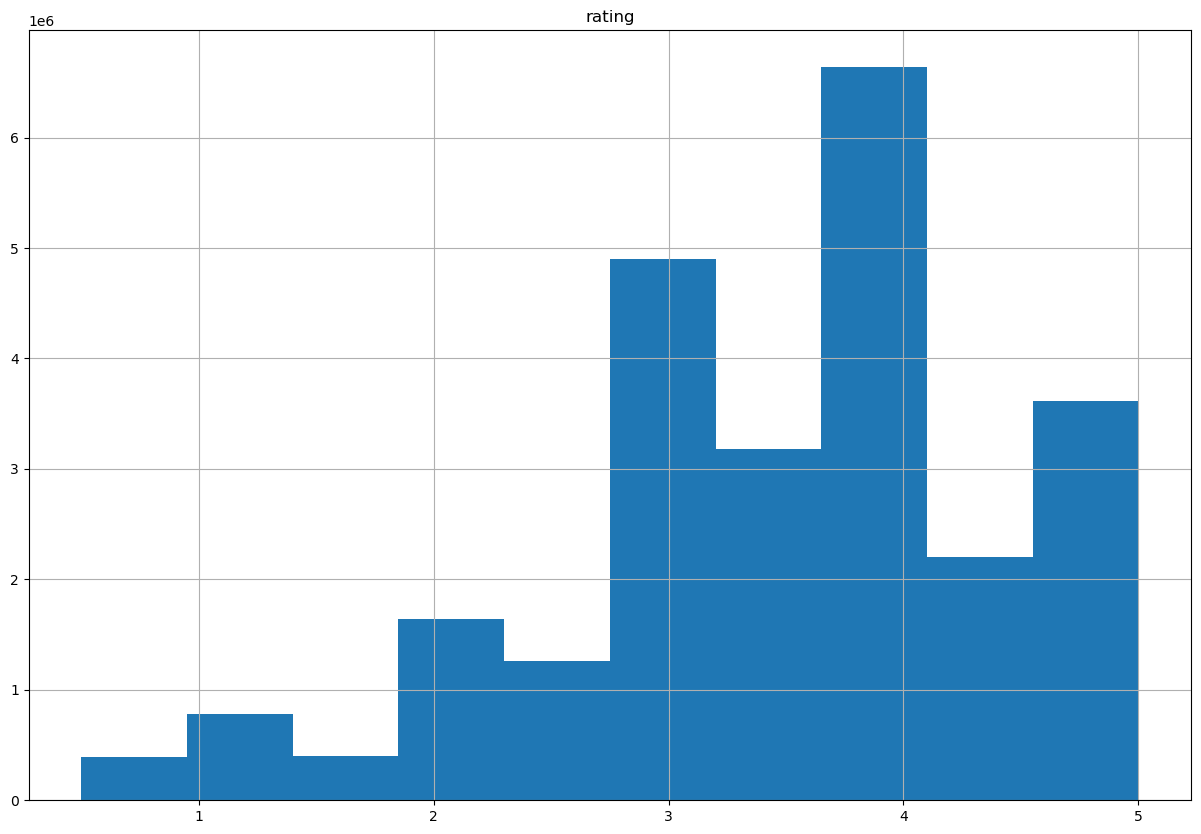

In [112]:
%matplotlib inline
# histogram for rating column from data frame ratings
ratings.hist(column='rating', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [113]:
tags['tag'].head() #just column tag from tags

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [114]:
movies[['title','genres']].head() #get the LIST of columns

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [115]:
ratings[1000:1010] #from row 1000 to 1009 (with 10009)

,userId,movieId,rating
1000,4,45517,2.5
1001,4,45722,3.5
1002,4,46948,2.5
1003,4,46972,3.5
1004,4,48780,5.0
1005,4,48982,3.0
1006,4,49272,3.5
1007,4,49396,3.5
1008,4,49649,1.0
1009,4,50601,1.5


In [117]:
tag_counts = tags['tag'].value_counts() #for every value for tag count the appearance
tag_counts[:10] #just show 0 to 9 (with 9)

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

# .plot function - barchart

<Axes: >

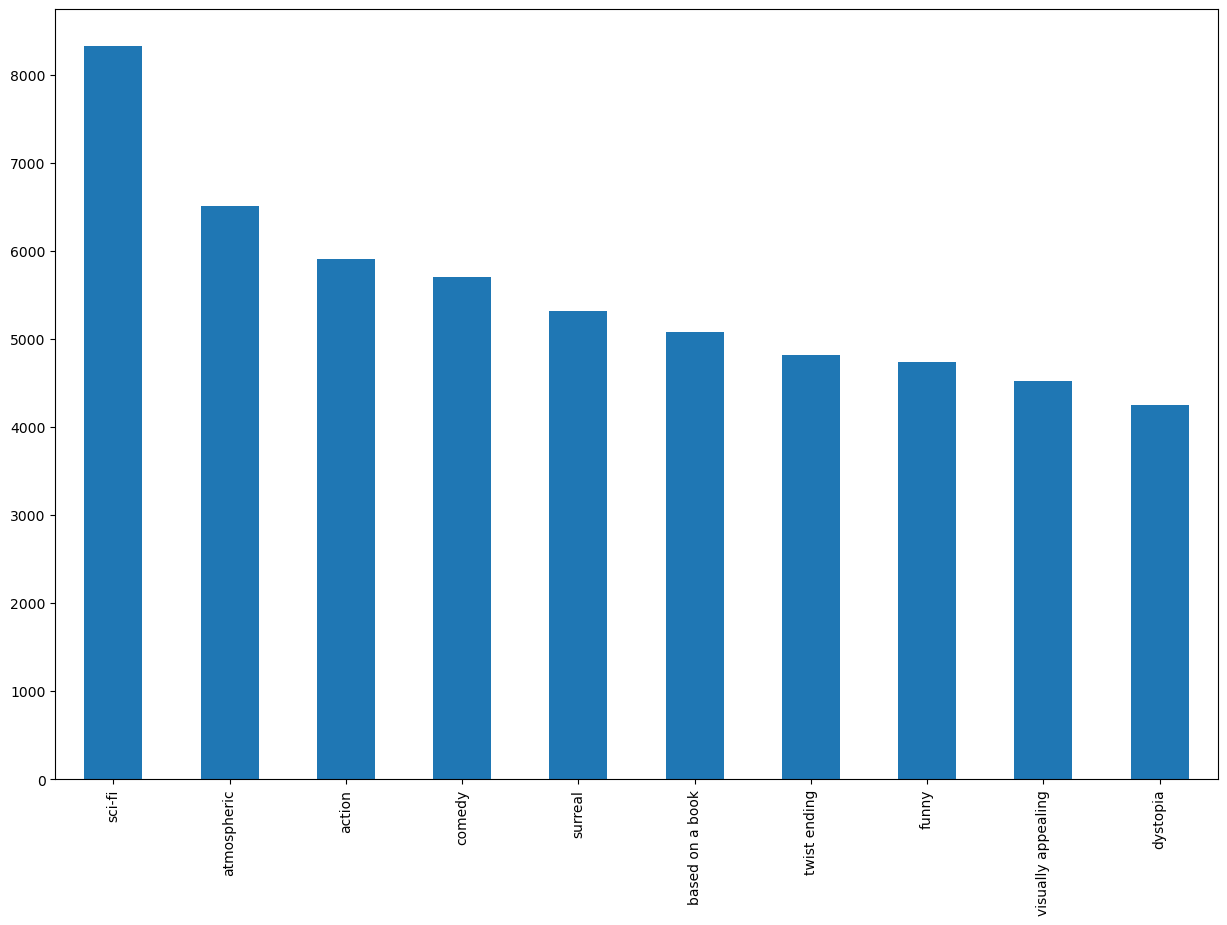

In [118]:
tag_counts[:10].plot(kind='bar', figsize=(15,10)) 

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [123]:
is_highly_rated = ratings['rating'] >= 4.0
print(is_highly_rated) #for every row true/false according the condition

print(ratings[is_highly_rated][-5:]) #from ratings use only row where condition is true - just the last 5 rows 

0            True
1           False
2            True
3            True
4           False
            ...  
25000090     True
25000091    False
25000092    False
25000093     True
25000094     True
Name: rating, Length: 25000095, dtype: bool
          userId  movieId  rating
25000088  162541    41566     4.0
25000089  162541    45517     4.5
25000090  162541    50872     4.5
25000093  162541    58559     4.0
25000094  162541    63876     5.0


# movies['genres'].str.contains('Animation')

In [124]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15] #rows from 5 to 14

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [126]:
movies[is_animation].head(15) # the first 15 rows

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [128]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count # preuzmi ove dve kolone, grupisi po rating i saberi movIeid --> does not make sense

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [129]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()
#group by movieId and count the mean for ratings

,rating
movieId,
209157,1.5
209159,3.0
209163,4.5
209169,3.0
209171,3.0


In [130]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [131]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [132]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [133]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# .merge - function for merging dataframes

In [135]:
#merge (inner join) movies df with tags on movieId
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregation, merging, and filters to get useful analytics
</p>

In [141]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
print(avg_ratings)
del avg_ratings['userId'] #brise kolonu userId jer je ostala
print(avg_ratings.head())

#other stuff are in above examples too

       movieId         userId    rating
0            1   81294.564728  3.893708
1            2   81358.542554  3.251527
2            3   81343.694934  3.142028
3            4   81266.193024  2.853547
4            5   81002.872460  3.058434
...        ...            ...       ...
59042   209157  119571.000000  1.500000
59043   209159  115835.000000  3.000000
59044   209163    6964.000000  4.500000
59045   209169  119571.000000  3.000000
59046   209171  119571.000000  3.000000

[59047 rows x 3 columns]
   movieId    rating
0        1  3.893708
1        2  3.251527
2        3  3.142028
3        4  2.853547
4        5  3.058434


In [138]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
59042,209157,We (2018),Drama,1.5
59043,209159,Window of the Soul (2001),Documentary,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5
59045,209169,A Girl Thing (2001),(no genres listed),3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,3.0


In [139]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
59027,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary,4.0
59028,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary,4.0
59029,209129,Destination Titan (2011),Documentary,4.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [140]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
6,7,Sabrina (1995),Comedy|Romance,3.363666


In [142]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
58990,208911,Cheating in Chains (2006),Comedy,4.0000
58998,208939,Klaus (2019),Adventure|Animation|Children|Comedy,4.3125
59001,208945,Powder (2019),Comedy|Drama,4.5000
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0000
59044,209163,Bad Poems (2018),Comedy|Drama,4.5000


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [143]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

# movie_genres = movies['genres'].str.split('|', expand=True)

In [148]:
movie_genres = movies['genres'].str.split('|', expand=True) # expand represents it as table

In [147]:
movie_genres[:10]

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: genres, dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [149]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [150]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [151]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [152]:
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [153]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [154]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [155]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


# how to parse timestampt to date time 

In [156]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [157]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [158]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [159]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((1093360, 5), (692112, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

# Sorting the table using the timestamps 
    can use for sorting by any attribute
</p>

In [160]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
900600,129396,2788,monty python,1135429210,2005-12-24 13:00:10
900595,129396,1732,coen brothers,1135429236,2005-12-24 13:00:36
900592,129396,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
900591,129396,1193,jack nicholson,1135429371,2005-12-24 13:02:51
900607,129396,5004,peter sellers,1135429399,2005-12-24 13:03:19
900589,129396,47,brad pitt,1135429412,2005-12-24 13:03:32
900590,129396,47,morgan freeman,1135429412,2005-12-24 13:03:32
900605,129396,4011,guy ritchie,1135429431,2005-12-24 13:03:51
900604,129396,4011,brad pitt,1135429431,2005-12-24 13:03:51
900588,129396,32,bruce willis,1135429442,2005-12-24 13:04:02


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [161]:
#for every movie calculate the average rating
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail() #get dqataframe

,movieId,rating
59042,209157,1.5
59043,209159,3.0
59044,209163,4.5
59045,209169,3.0
59046,209171,3.0


In [164]:
#merge movies and average ratings and makes correlation
joined = movies.merge(average_rating, on='movieId', how='inner')
print(joined.head())
joined.corr() #why only movieId and rating?? --> just between numeric values!!

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.893708  
1                   Adventure|Children|Fantasy  1995  3.251527  
2                               Comedy|Romance  1995  3.142028  
3                         Comedy|Drama|Romance  1995  2.853547  
4                                       Comedy  1995  3.058434  


C:\Users\user\AppData\Local\Temp\ipykernel_2792\2231299493.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joined.corr()


,movieId,rating
movieId,1.000000,-0.093459
rating,-0.093459,1.000000


In [163]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10] # count average rating per year

,year,rating
0,1874,3.027778
1,1878,2.909091
2,1880,2.666667
3,1883,2.636364
4,1887,1.750000
5,1888,2.373042
6,1890,2.196667
7,1891,1.692842
8,1892,1.530769
9,1894,2.376825


<Axes: xlabel='year'>

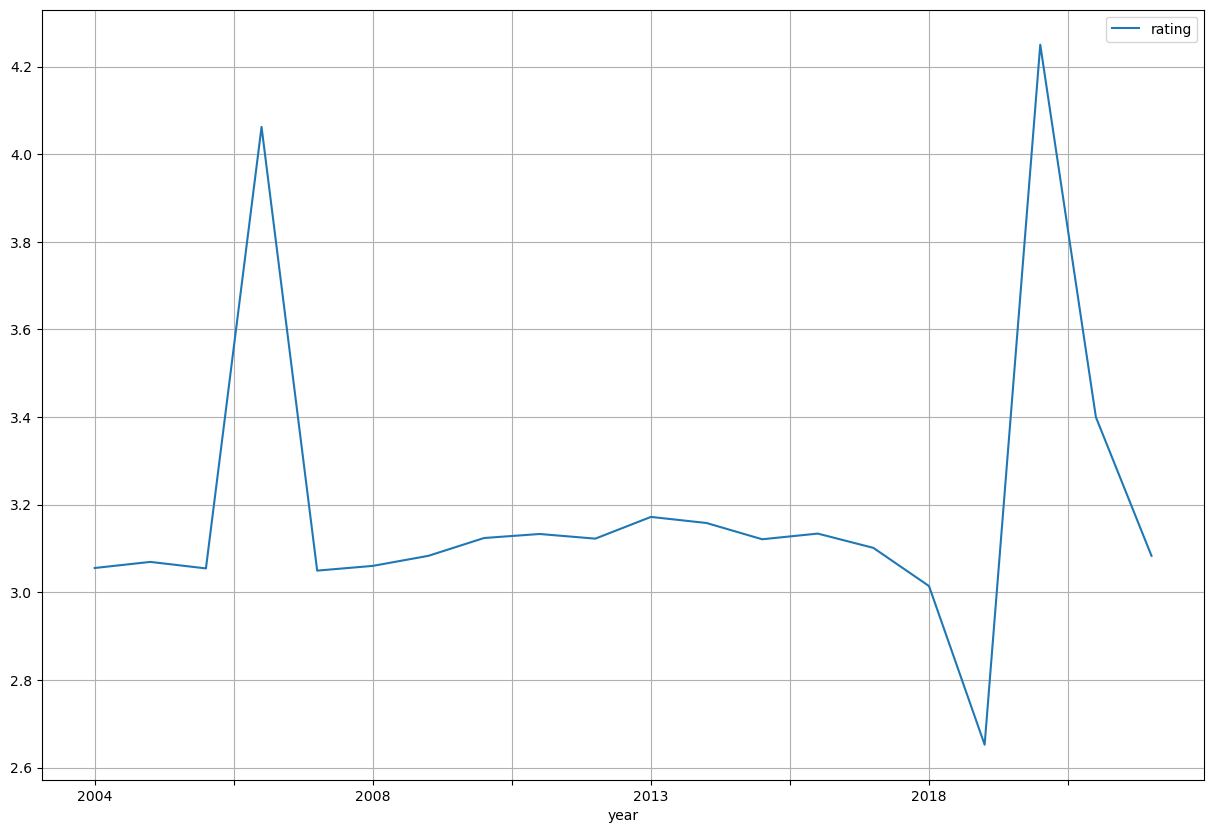

In [166]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True) # so we can look when the best movies were filmed

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>